# Minitutorial Neurokit orientado a Neurokit

## 1. Instalación de la herramienta

In [2]:
pip install neurokit2

Note: you may need to restart the kernel to use updated packages.


## 2. Importación del módulo de neurokit y de las librerías necesarias 

In [4]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 

A continuación podemos observar una imagen con los componentes principales de las señales ECG.

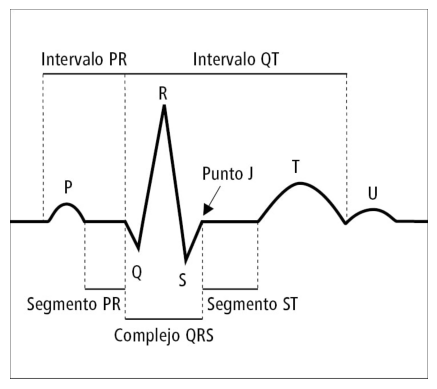

In [22]:
from PIL import Image
import matplotlib.pyplot as plt

# Open an image file
img = Image.open('ekg.jpg')  # Replace with your image path

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

A continuación se hará un ejemplo del tutorial con las señales ECG de la derivación.

In [26]:
path=os.getcwd()
folder_path = path + '/ECGDataDenoised'
files = os.listdir(folder_path)
print("Número de archivos extraídos de la carpeta 'ECGDataDenoised':", len(files))


Número de archivos extraídos de la carpeta 'ECGDataDenoised': 10646


In [28]:
# Se muestra el número de archivos presentes en la carpeta.
datos = pd.read_csv('ECGDataDenoised/MUSE_20180712_161101_86000.csv',delimiter=',',names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datos.head()

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,-330.49,-246.09,65.766,287.12,-227.08,-67.184,-41.829,-49.263,-41.946,-71.187,-223.47,-114.62
1,-321.16,-235.93,67.409,277.06,-221.68,-62.000,-42.648,-48.339,-45.288,-76.669,-225.22,-119.51
2,-312.36,-226.93,68.408,267.87,-216.45,-57.651,-43.571,-47.511,-47.859,-79.949,-225.53,-124.01
3,-304.40,-219.59,68.573,259.99,-211.58,-54.425,-44.612,-46.703,-49.062,-79.421,-223.36,-127.67
4,-297.28,-213.53,68.301,253.22,-207.25,-51.884,-45.636,-45.747,-48.507,-74.479,-218.34,-130.02


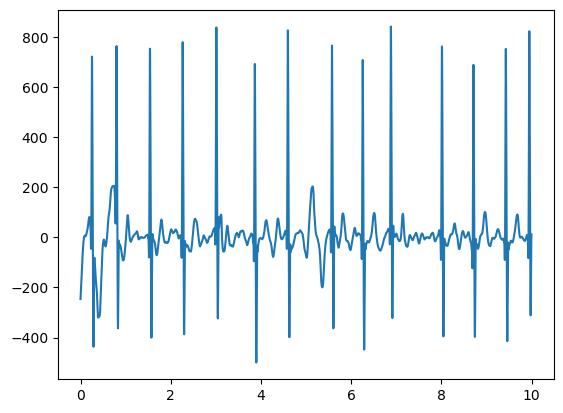

In [30]:
fs = 500

signal_ekg = datos['II'].values #Se extraen los valores de la señal.
tiempo = np.arange(0, signal_ekg.shape[0]/fs,1/fs) #Se construye el vector de tiempo

plt.plot(tiempo,signal_ekg)

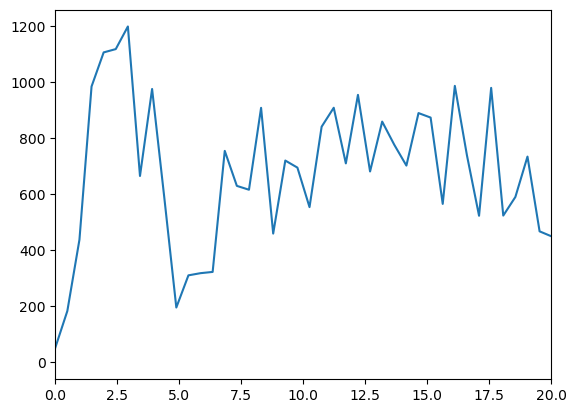

In [32]:
from scipy import signal

f, Pxx_den = signal.welch(signal_ekg, fs, nperseg=1024,noverlap=512)
plt.plot(f, Pxx_den)
plt.xlim([0,20])
#plt.xlabel('frequency [Hz]')
#plt.ylabel('PSD [V**2/Hz]')
plt.show()

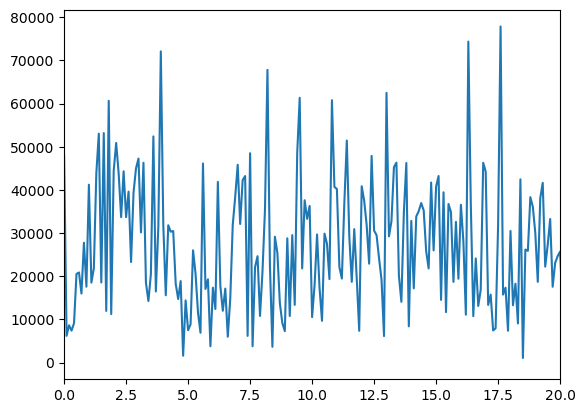

In [34]:
from scipy import fft

EKG = fft.fft(signal_ekg)
f = np.arange(0,fs,fs/signal_ekg.shape[0])
plt.plot(f, np.abs(EKG))
plt.xlim([0,20])
#plt.xlabel('frequency [Hz]')
#plt.ylabel('PSD [V**2/Hz]')
plt.show()
     

## Emplear la función para localizar los picos R 

Para localizar los picos R se utiliza la función ecg_peaks(), a la que se le entregan como parámetros la señal ECG, la frecuencia de muestreo, y se indica si se desea hacer una corrección de los artefactos y show para visualizar el resultado con los picos R identificados.

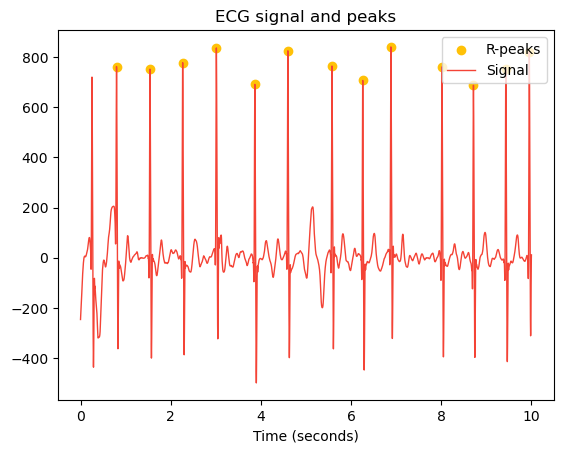

In [36]:
signals, rpeaks = nk.ecg_peaks(signal_ekg, sampling_rate=fs, correct_artifacts=False, show=True)

## Función de procesamiento de la señal ECG

Esta función se emplea para hacer un proceso automatizado para el preprocesamiento de una señal ECG, y abarca distintas funciones: limpieza (usando ecg_clean()), detección de picos (usando ecg_peaks()), cálculo de frecuencia cardíaca (usando signal_rate()), evaluación de la calidad de la señal (usando ecg_quality()), delineación del complejo QRS (usando ecg_delineate()) y determinación de la fase cardíaca (usando ecg_phase()).

C:\Users\USUARIO\Documents\CAROLINA\Lib\site-packages\neurokit2\ecg\ecg_plot.py:70: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(


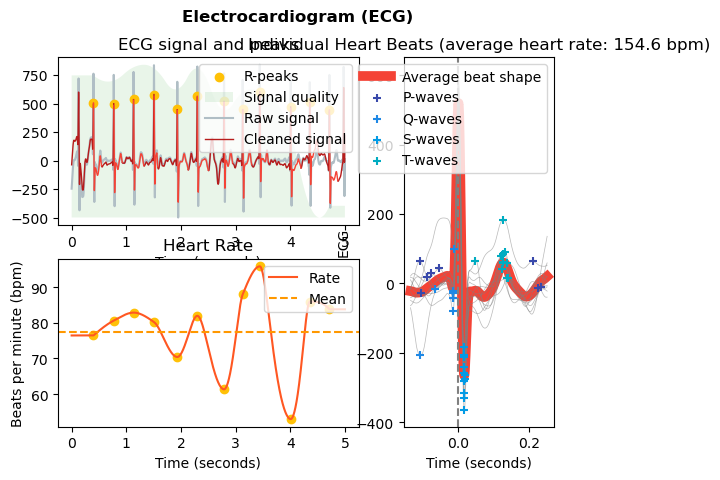

<Figure size 1400x1000 with 0 Axes>

In [47]:
# Procesamiento de la señal ECG
ecg_signals, info = nk.ecg_process(signal_ekg, sampling_rate=500) #Recibe como argumentos la señal y la frecuencia de muestreo.

# Visualización básica
nk.ecg_plot(ecg_signals)
plt.figure(figsize=(14, 10))
plt.show()

## Aplicación de la función para localizar ondas P, Q, S y T en el ECG 

Esta función sirve para delimitar las diferentes ondas de los ciclos cardíacos. 

**Paso 1: Delinear**

In [52]:
# Delineate cardiac cycle
signals, waves = nk.ecg_delineate(signal_ekg, rpeaks, sampling_rate=1000)
print(waves)

{'ECG_P_Peaks': [258, 625, 1005, 1365, 1796, 2188, nan, 3040, nan, 3904, 4239, 4628, 4842], 'ECG_P_Onsets': [214, 610, 972, 1328, 1783, 2140, nan, 2995, nan, 3868, 4203, 4600, 4795], 'ECG_P_Offsets': [275, 643, 1023, 1402, 1845, 2222, nan, 3059, nan, 3927, 4262, 4659, 4868], 'ECG_Q_Peaks': [389, 759, 1121, 1495, 1922, 2287, 2777, 3118, 3430, 3996, 4345, 4704, nan], 'ECG_R_Onsets': [379, 752, 1114, 1488, 1915, 2281, nan, 3111, nan, 3988, 4338, 4697, nan], 'ECG_R_Offsets': [423, 795, 1157, 1531, 1958, 2324, 2812, 3154, 3465, 4032, 4381, 4740, nan], 'ECG_S_Peaks': [415, 786, 1149, 1522, 1949, 2315, 2804, 3145, 3457, 4023, 4372, 4731, nan], 'ECG_T_Peaks': [522, 896, 1270, 1627, 2058, 2435, 2909, 3255, 3573, 4147, 4484, 4842, nan], 'ECG_T_Onsets': [491, 850, 1228, 1600, 2036, 2417, 2887, 3229, 3554, 4130, 4460, 4810, nan], 'ECG_T_Offsets': [546, 927, 1325, 1655, 2133, 2507, 2944, 3292, 3596, 4166, 4521, 4868, nan]}


**Paso 2: Graficar los picos P y los picos T**
Las ondas P se marcan como 0 y las ondas T como 1. 

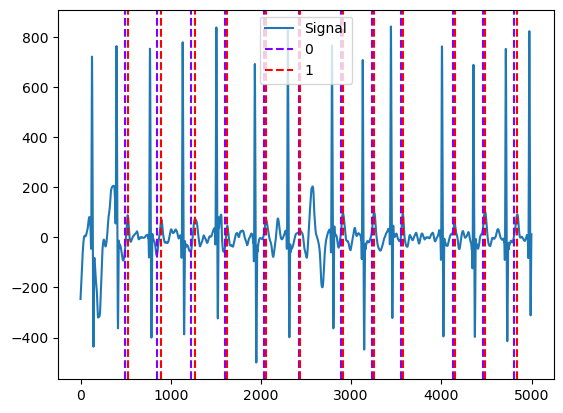

In [55]:
nk.events_plot([waves["ECG_T_Onsets"], waves["ECG_T_Peaks"]], signal_ekg)

## Encontrar picos R en una señal de ECG

El método a utilizar a continuación se utiliza para localizar los picos R en la señal. Puede utilizar señales de ECG sin filtrar como entrada, pero normalmente un ECG filtrado da mejores resultados.

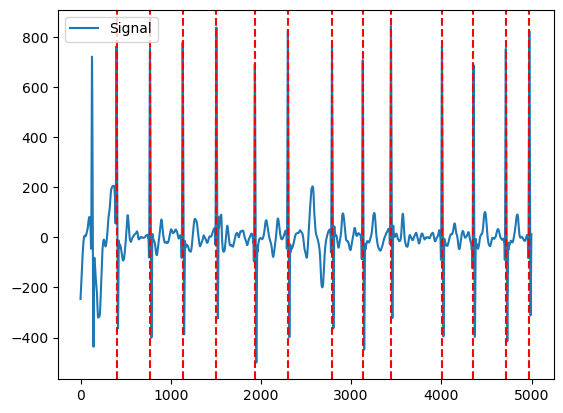

In [58]:
# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(signal_ekg, sampling_rate=500)
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], signal_ekg)

Posteriormente se puede visualizar en un gráfico las identificaciones de las ondas identificadas. 

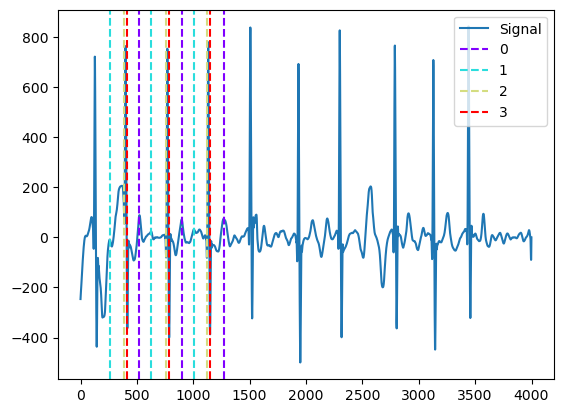

In [61]:
plot = nk.events_plot([waves['ECG_T_Peaks'][:3], 
                       waves['ECG_P_Peaks'][:3],
                       waves['ECG_Q_Peaks'][:3],
                       waves['ECG_S_Peaks'][:3]], signal_ekg[:4000])

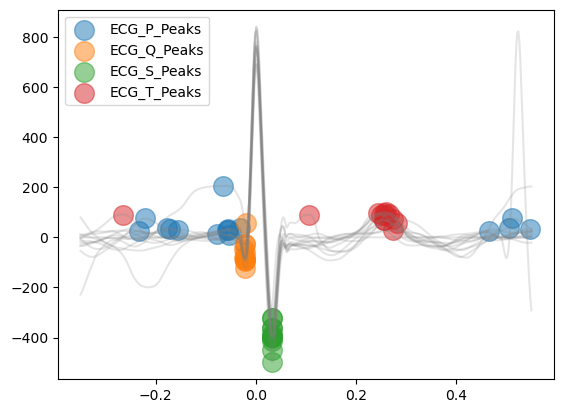

In [63]:
# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves = nk.ecg_delineate(signal_ekg, 
                                 rpeaks, 
                                 sampling_rate=500, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

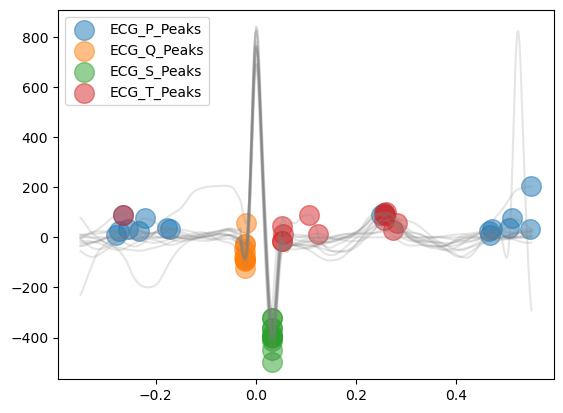

In [64]:
# Visualize P-peaks and T-peaks
signal_cwt, waves= nk.ecg_delineate(signal_ekg, 
                                         rpeaks, 
                                         sampling_rate=500, 
                                         method="cwt", 
                                         show=True, 
                                         show_type='peaks')

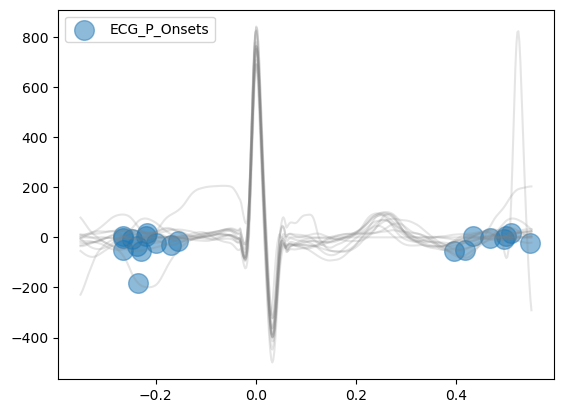

In [66]:
# Delineate the ECG signal and visualizing all P-peaks boundaries
signal_peak, waves = nk.ecg_delineate(signal_ekg, 
                                           rpeaks, 
                                           sampling_rate=500,
                                           method="peak", 
                                           show=True, 
                                           show_type='bounds_P')

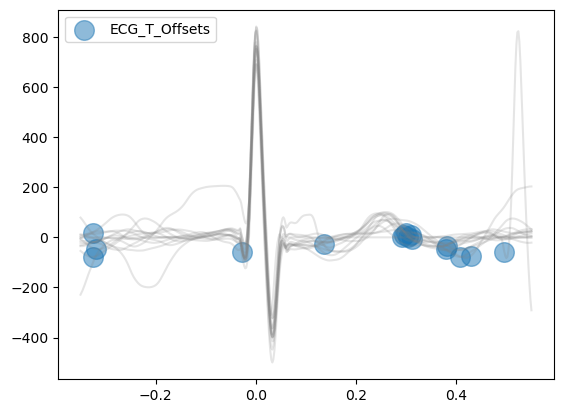

In [68]:
# Delineate the ECG signal and visualizing all T-peaks boundaries
signal_peaj, waves = nk.ecg_delineate(signal_ekg, 
                                           rpeaks, 
                                           sampling_rate=500, 
                                           method="peak", 
                                           show=True, 
                                           show_type='bounds_T')

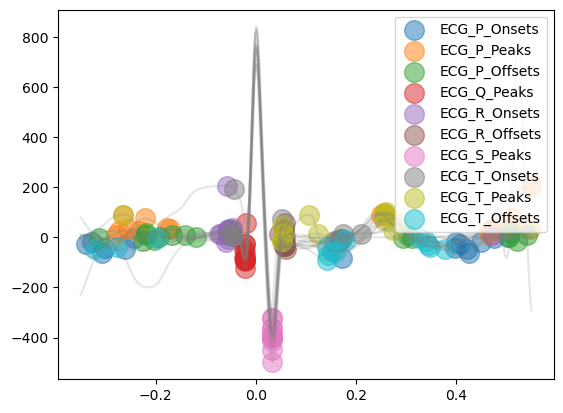

In [69]:
# Delineate the ECG signal
signal_cwt, waves = nk.ecg_delineate(signal_ekg, 
                                         rpeaks, 
                                         sampling_rate=500, 
                                         method="cwt", 
                                         show=True, 
                                         show_type='all')

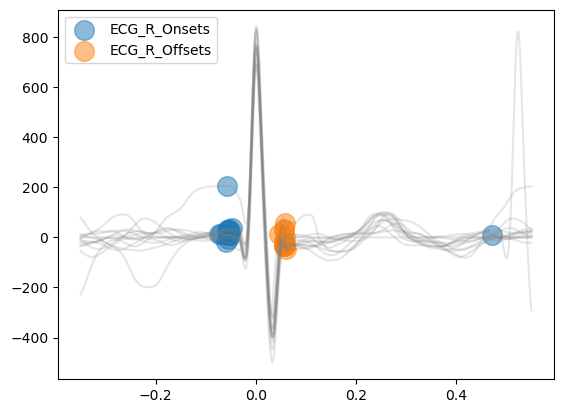

In [70]:
# Visualize R-waves boundaries
signal_cwt, waves= nk.ecg_delineate(signal_ekg, 
                                         rpeaks, 
                                         sampling_rate=500, 
                                         method="cwt", 
                                         show=True, 
                                         show_type='bounds_R')

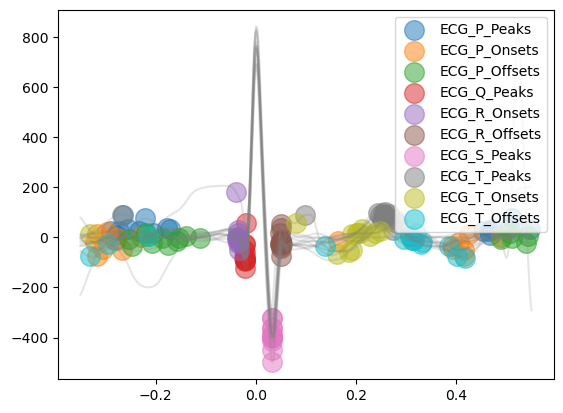

In [71]:
# Delineate the ECG signal
signal_dwt, waves = nk.ecg_delineate(signal_ekg, 
                                         rpeaks, 
                                         sampling_rate=500, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='all')

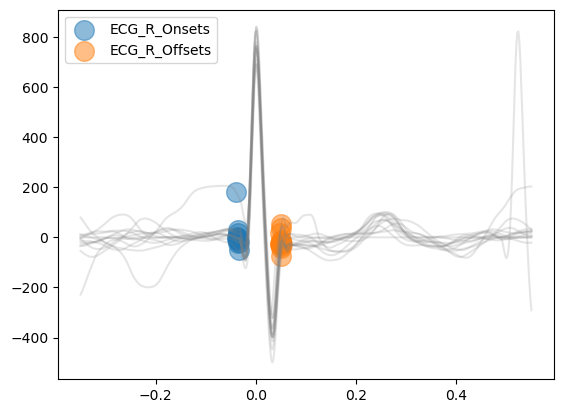

In [73]:
# Visualize R-wave boundaries
signal_dwt, waves = nk.ecg_delineate(signal_ekg, 
                                         rpeaks, 
                                         sampling_rate=500, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='bounds_R')

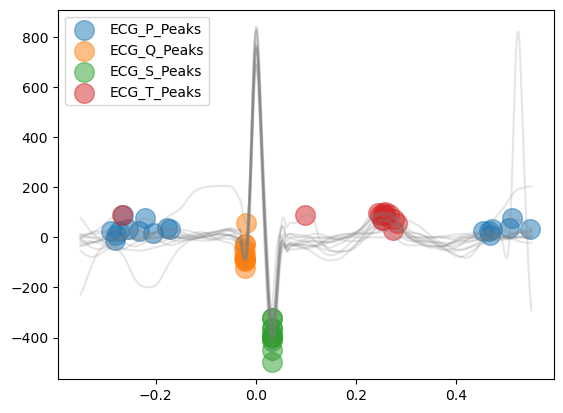

In [74]:
# Visualize P-peaks and T-peaks
signal_dwt, waves= nk.ecg_delineate(signal_ekg, 
                                         rpeaks, 
                                         sampling_rate=500, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='peaks')

## Variabilidad de la frecuencia cardíaca (VFC) 

También es posible calcular todos los índices de variabilidad de la frecuencia cardiaca. En el siguiente ejemplo se emplea la función para calcular los índices de dominio temporal de la VFC.

### Índices temporales de la VFC que entrega la función hrv_time()

- **MeanNN**: Media de los intervalos RR.
- **SDNN**: Desviación estándar de los intervalos RR.
- **SDANN1, SDANN2, SDANN5**: 
  - Desviación estándar de los intervalos RR promedio extraídos de segmentos de n minutos (1, 2, y 5 minutos por defecto).
  - Requieren una duración mínima de la señal (3, 6 y 15 minutos respectivamente).
- **SDNNI1, SDNNI2, SDNNI5**:
  - Media de las desviaciones estándar de los intervalos RR extraídos de segmentos de n minutos (1, 2, y 5 minutos por defecto).
  - Requieren una duración mínima de la señal (3, 6 y 15 minutos respectivamente).
- **RMSSD**: 
  - Raíz cuadrada de la media de las diferencias sucesivas al cuadrado entre intervalos RR adyacentes.
  - Equivalente (aunque en otra escala) a **SD1**.
- **SDSD**: Desviación estándar de las diferencias sucesivas entre los intervalos RR.
- **CVNN**: 
  - Desviación estándar de los intervalos RR (**SDNN**) dividida por la media de los intervalos RR (**MeanNN**).
- **CVSD**: 
  - Raíz cuadrada media de las diferencias sucesivas (**RMSSD**) dividida por la media de los intervalos RR (**MeanNN**).
- **MedianNN**: Mediana de los intervalos RR.
- **MadNN**: Desviación absoluta media de los intervalos RR.
- **MCVNN**: 
  - Desviación absoluta media de los intervalos RR (**MadNN**) dividida por la mediana de los intervalos RR (**MedianNN**).
- **IQRNN**: Rango intercuartil (RIC) de los intervalos RR.
- **SDRMSSD**: 
  - Relación **SDNN / RMSSD**, un equivalente en el dominio del tiempo para la relación de baja frecuencia a alta frecuencia (LF/HF).
- **Prc20NN**: Percentil 20 de los intervalos RR.
- **Prc80NN**: Percentil 80 de los intervalos RR.
- **pNN50**: 
  - Porcentaje de diferencias absolutas en intervalos RR sucesivos mayores de 50 ms.
- **pNN20**: 
  - Porcentaje de diferencias absolutas en intervalos RR sucesivos mayores de 20 ms.
- **MinNN**: Mínimo de los intervalos RR.
- **MaxNN**: Máximo de los intervalos RR.
- **TINN**: 
  - Parámetro geométrico de la HRV.
  - Ancho de línea base de la distribución de los intervalos RR obtenido por interpolación triangular.
- **HTI**: 
  - Índice triangular HRV.
  - Mide el número total de intervalos RR dividido por la altura del histograma de intervalos RR.
 altura del histograma de intervalos RR.

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_IQRNN,HRV_SDRMSSD,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN
0,916.8,436.425073,NaN,NaN,NaN,NaN,NaN,NaN,486.372971,514.614419,...,119.0,0.897305,710.0,1030.4,60.0,90.0,428.0,1728.0,10.0,0.0


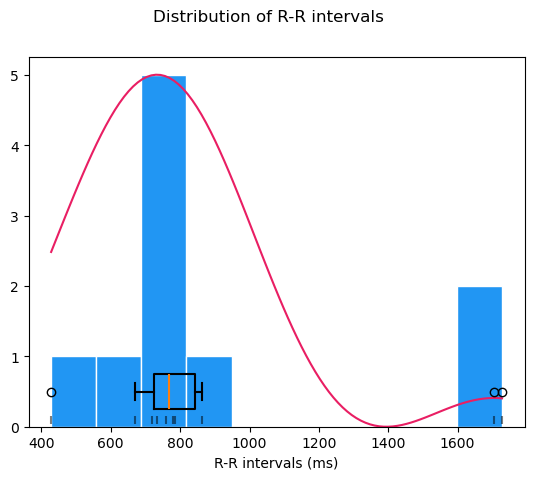

In [79]:
# Extract clean EDA and SCR features
hrv_time = nk.hrv_time(signals, sampling_rate=500, show=True)
hrv_time

Así como en el tiempo, también es posible calcular índices de la variabilidad de la frecuencia cardiaca en el dominio de la frecuencia y la potencia en diferentes bandas de frecuencia, como se mostrará a continuación con nk.hrv_frequency(). Los datos entregados son:

### Índices temporales de la VFC que entrega la función hrv_frequency()

- **HRV_ULF:** La potencia espectral de frecuencias ultrabajas (por defecto, 0,0 a 0,0033 Hz). Se requieren señales muy largas para que se extraiga este índice; de ​​lo contrario, devolverá NaN.

- **HRV_VLF:** La potencia espectral de frecuencias muy bajas (por defecto, 0,0033 a 0,04 Hz).

- **HRV_LF:** La potencia espectral de las frecuencias bajas (por defecto, 0,04 a 0,15 Hz).

- **HRV_HF:** La potencia espectral de las frecuencias altas (por defecto, 0,15 a 0,4 Hz).

- **HRV_VHF:** La potencia espectral de frecuencias muy altas (por defecto, 0,4 a 0,5 Hz).

- **HRV_TP:** La potencia espectral total.

- **HRV_LFHF:** La relación que se obtiene al dividir la potencia de baja frecuencia por la potencia de alta frecuencia.

- **HRV_LFn:** La frecuencia baja normalizada, obtenida al dividir la potencia de baja frecuencia por la potencia total.

- **HRV_HFn:** La frecuencia alta normalizada, obtenida al dividir la potencia de baja frecuencia por la potencia total.

- **HRV_LnHF:** El registro transformó HF.

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_TP,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,0.001195,0.000033,1.203099e-07,0.001227,36.587583,0.9733,0.026602,-10.329548


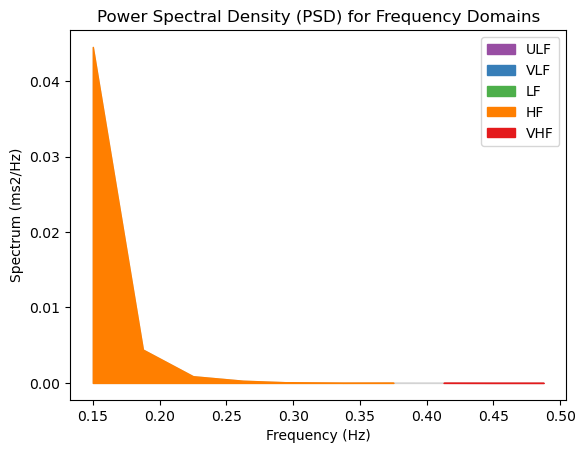

In [101]:
hrv_freq = nk.hrv_frequency(signals, sampling_rate=100, show=True, normalize=True)
hrv_freq